   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

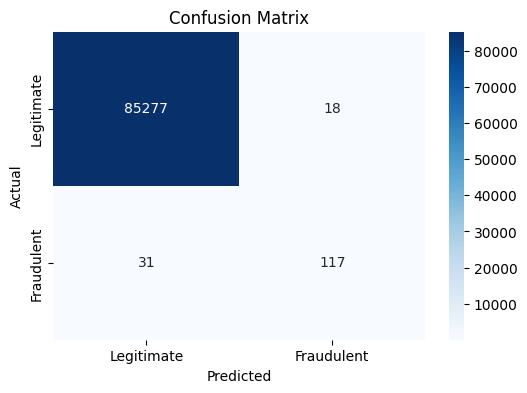


Simplified Summary:
Out of 85443 purchases, we have detected that:
 - 117 are fraudulent transactions.
 - 85277 are legitimate purchases.
This comes out to 0.14% being fraudulent.


In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE for oversampling

# Load the dataset
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
data = pd.read_csv(url)

# Explore the dataset
print(data.head())  # Display the first 5 rows
print(data.info())  # Display dataset information
print(data['Class'].value_counts())  # Count instances of each class

# Preprocess the data
X = data.drop(['Class'], axis=1)  # Features
y = data['Class']  # Target variable

# Scale the 'Amount' and 'Time' features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to balance the dataset (oversampling the minority class)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest Classifier on the resampled data
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraudulent'],
            yticklabels=['Legitimate', 'Fraudulent'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Simplified Output Summary
total_transactions = len(y_test)  # Total transactions in the test set
fraudulent_detected = sum((y_test == 1) & (y_pred == 1))  # Correctly identified frauds
legitimate_detected = sum((y_test == 0) & (y_pred == 0))  # Correctly identified legitimate
fraudulent_total = sum(y_test == 1)  # Total actual frauds in test set

fraudulent_percentage = (fraudulent_detected / total_transactions) * 100

# Print the summary
print("\nSimplified Summary:")
print(f"Out of {total_transactions} purchases, we have detected that:")
print(f" - {fraudulent_detected} are fraudulent transactions.")
print(f" - {legitimate_detected} are legitimate purchases.")
print(f"This comes out to {fraudulent_percentage:.2f}% being fraudulent.")
